In [1]:
from torchvision import models
import torch
from explanable.common.utilize import readImageAndPreprocessing
from explanable.explainmethods.CamExpl import CamExplClass
from explanable.visualization import visual
from explanable.metrics.MorfLerf import MorfLerfClass
from explanable.visualization.visual import showChapter
from explanable.visualization.visual import showByPictures

%load_ext autoreload
%autoreload 2

PATH_TO_IMAGE = "../image/deer.png"
# PATH_TO_IMAGE = '../image/cat.jpg'
inputs = readImageAndPreprocessing(PATH_TO_IMAGE)
print(inputs.shape)

Microsoft Visual C++ Redistributable is not installed, this may lead to the DLL load failure.
                 It can be downloaded at https://aka.ms/vs/16/release/vc_redist.x64.exe
(1, 3, 224, 224)


C:\anaconda\lib\site-packages\torchvision\io\image.py:13: UserWarning: Failed to load image Python extension: [WinError 127] Не найдена указанная процедура
  warn(f"Failed to load image Python extension: {e}")
2024-02-12 23:46:47,469 explanable.log INFO ((1, 3, 224, 224), <class 'numpy.ndarray'>)
2024-02-12 23:46:47,469 explanable.log INFO ((1, 3, 224, 224), <class 'numpy.ndarray'>)


In [2]:
model = models.resnet50()
model.load_state_dict(torch.load('../pretrainingmodel/resnet50-0676ba61.pth'))
model.eval()
print()

In [3]:
cam = CamExplClass(model)
cam.explain(inputs)

2024-02-12 23:46:49,258 explanable.log INFO ('result: ', (224, 224), ' inputs: ', torch.Size([1, 3, 224, 224]))
2024-02-12 23:46:49,258 explanable.log INFO ('result: ', (224, 224), ' inputs: ', torch.Size([1, 3, 224, 224]))


In [4]:
exp = cam.result

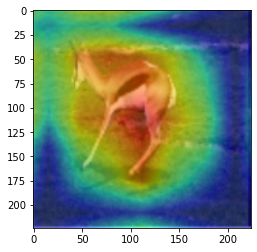

In [10]:
visual.showExplanation(cam.result, PATH_TO_IMAGE)

In [6]:
ml = MorfLerfClass(model)
ml.setExplanation(cam)
probeMorf, probeLerf = ml.evaluate(inputs)

0.11095955097815542
0.8704014499394578


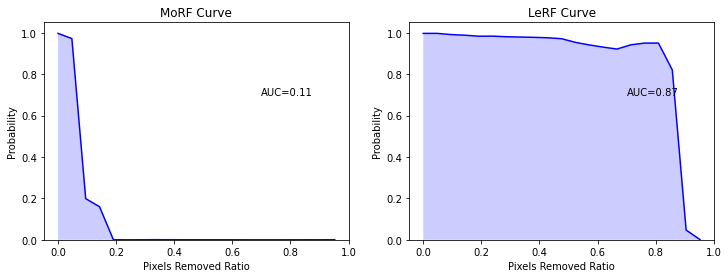

In [7]:
showChapter(probeMorf, probeLerf)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

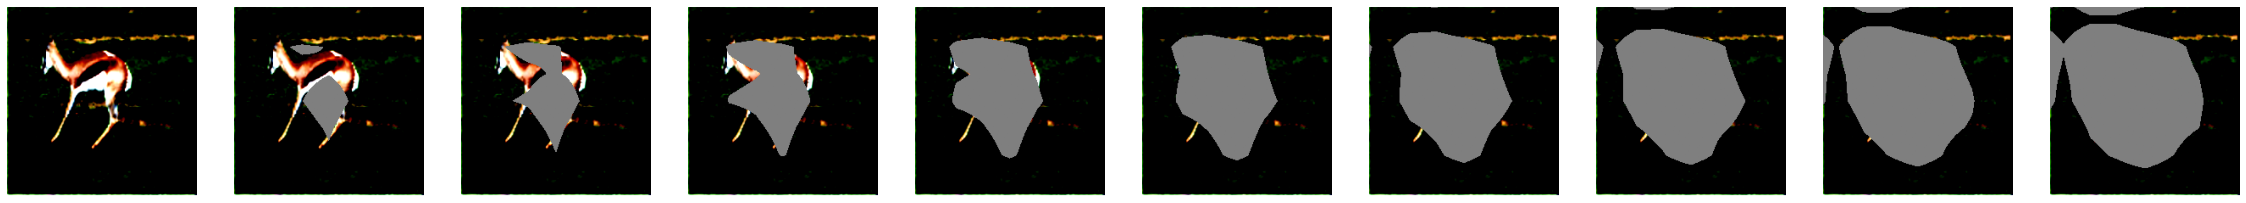

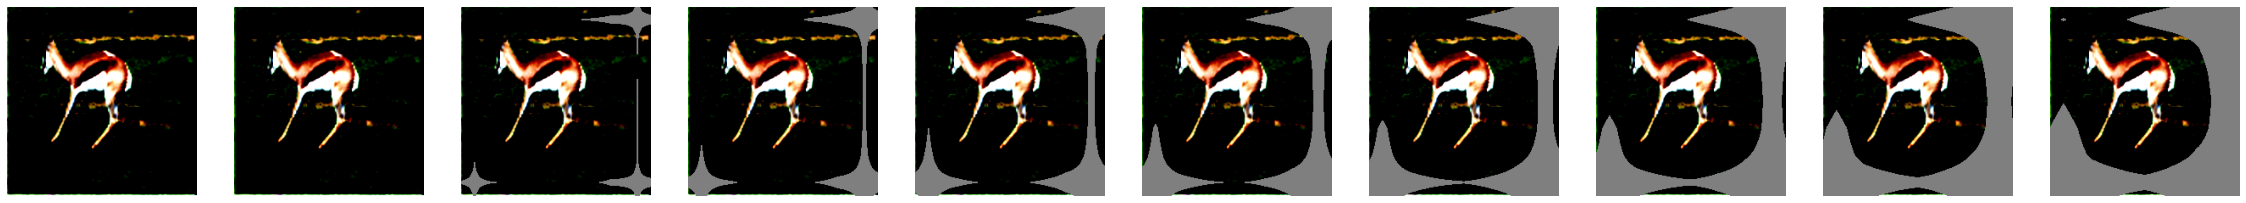

In [8]:
showByPictures(ml.intermediaResults)

(224, 224)
0.08753394816587734
0.9039412534219169


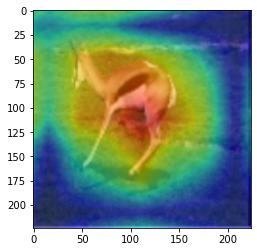

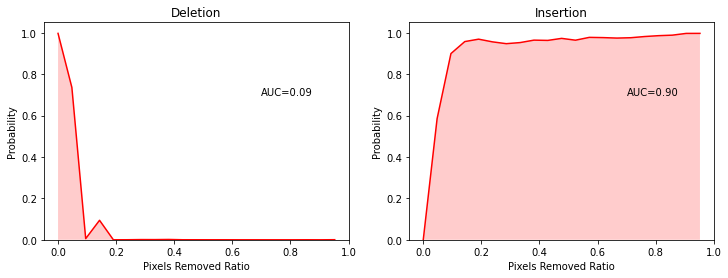

In [9]:
from explanable.metrics.DeletionInsertion import DeletionInsertionClass
from explanable.explainmethods.GradCamExpl import GradCamExplClass

gc = GradCamExplClass(model)
gc.explain(inputs)
print(gc.result.shape)

visual.showExplanation(gc.result, PATH_TO_IMAGE)

ml = DeletionInsertionClass(model)
ml.setExplanation(gc)
probeDel, probeIns = ml.evaluate(inputs)

showChapter(probeDel, probeIns)
